In [1]:
import sys
sys.path.append('../')
#from pyimzml.ImzMLParser import ImzMLParser, getionimage
#from pyImagingMSpec.inMemoryIMS import inMemoryIMS
from tqdm import tqdm
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
from scipy.stats import spearmanr, ttest_ind
import os, re, glob
import anndata
import scanpy as sc
from sklearn.metrics import accuracy_score
sys.path.append('../scms_py')
from scMSData import scMSData
from analysis import scMSAnalysis
from sklearn.preprocessing import LabelEncoder

import ipywidgets as widgets
from ipywidgets import Box, IntSlider

No module named 'brainpy._c.composition'

          SPIKE
    Version     : 0.99.30
    Date        : 22-03-2022
    Revision Id : 563
*** zoom3D not loaded ***
plugins loaded:
Fitter,  Linear_prediction,  Peaks,  bcorr,  fastclean,  gaussenh,  rem_ridge,  sane,  sg,  test,  urQRd, 

spike.plugins.report() for a short description of each plugins
spike.plugins.report('module_name') for complete documentation on one plugin
plugins loaded:
FTMS_calib,  PhaseMS,  diagonal_2DMS, 


In [49]:
5//2


2

In [2]:
# with open('deepMSI/peak_data_sc_regional_orig.pkl', 'rb') as handle:
#     peak_data_orig = pickle.load(handle)
with open('../peak_data_sc_regional_decode.pkl', 'rb') as handle:
    peak_data_decode = pickle.load(handle)

In [3]:
names = list(peak_data_decode.keys())
scms_decode = scMSData()
scms_orig = scMSData()
scms_tiss = scMSData()
scms_decode.names = names
scms_orig.names = names
scms_tiss.names = names
batch = [name.split('/')[2] for name in names]

In [4]:
regions = ['Corpus','Cortex','Hip','Striatum','Thalamus']
types = []
for name in names:
    for region in regions:
        if region in name:
            types.append(region)

In [5]:
import umap
labels = []
for t in types:
    labels.append(regions.index(t))
labels_batch = []
for b in batch:
    labels_batch.append(list(set(batch)).index(b))

In [6]:
metadata = pd.DataFrame({'types':types,'batch':batch},index=names)

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(types)
label_encoder.classes_

array(['Corpus', 'Cortex', 'Hip', 'Striatum', 'Thalamus'], dtype='<U8')

In [8]:
annot_df_tiss = pd.read_pickle('Coronal3D_annotation_decoded.pkl')

In [8]:
scms_decode.loadimzMLData('../peak_data_sc_regional_decode.imzML')
# scms_orig.loadimzMLData('deepMSI/peak_data_sc_regional_orig.imzML')
scms_tiss.loadimzMLData('../peak_data_sc_regional_decode.imzML')

/Users/richard/anaconda/envs/scms/lib/python3.8/site-packages/pyimzml/ontology/ontology.py:92: UserWarning: Accession IMS:1000491 found with incorrect name "line scan left right". Updating name to "linescan left right".
  warn(


TODO: convert indices into real world coordinates
loaded spectra
file loaded
TODO: convert indices into real world coordinates
loaded spectra
file loaded


In [9]:
metadata['types']=='Cortex'

E:/20220209_BrainDissociate3D/Slide5_IndividualRegions/Corpus\x_75033y_15293.d       False
E:/20220209_BrainDissociate3D/Slide5_IndividualRegions/Corpus\x_75050y_16593.d       False
E:/20220209_BrainDissociate3D/Slide5_IndividualRegions/Corpus\x_75154y_15888.d       False
E:/20220209_BrainDissociate3D/Slide5_IndividualRegions/Corpus\x_75227y_13834.d       False
E:/20220209_BrainDissociate3D/Slide5_IndividualRegions/Corpus\x_75305y_14826.d       False
                                                                                     ...  
E:/20220209_BrainDissociate3D/Slide10_IndividualRegions/Thalamus\x_45337y_18635.d    False
E:/20220209_BrainDissociate3D/Slide10_IndividualRegions/Thalamus\x_45370y_17881.d    False
E:/20220209_BrainDissociate3D/Slide10_IndividualRegions/Thalamus\x_45385y_19631.d    False
E:/20220209_BrainDissociate3D/Slide10_IndividualRegions/Thalamus\x_45397y_13667.d    False
E:/20220209_BrainDissociate3D/Slide10_IndividualRegions/Thalamus\x_45434y_15527.d    False

In [10]:
scms_decode.intens_mtx[scms_decode.intens_mtx.columns[scms_decode.intens_mtx.columns>734]]

AttributeError: 'scMSData' object has no attribute 'intens_mtx'

In [11]:
plt.figure()
plt.plot(scms_decode.intens_mtx.columns,scms_decode.intens_mtx[metadata['types']=='Hip'].values[548])

AttributeError: 'scMSData' object has no attribute 'intens_mtx'

<Figure size 432x288 with 0 Axes>

In [10]:
# scms_orig.getIntensMtxData(ppm=2, feature_n=0.15, mz_range=(400,1600))

In [14]:
scms_decode.getIntensMtxData(ppm=3, feature_n=0.1, mz_range=(400,1100))

number of mass bins 168602


100%|█████████████████████████████████| 168602/168602 [00:18<00:00, 9362.99it/s]


In [15]:
sc_decode_data=scms_decode.intens_mtx.replace(-1,0)

In [120]:
sc_decode = scMSAnalysis(metadata)
sc_decode.preprocessing(sc_decode_data,norm_method='rms',feat_drop_rate=0.05,cell_drop_rate=0.05)

filtered intensity matrix with shape (13563, 6812)


In [121]:
sc_decode.get_labels(['types','batch'])

In [122]:
#process(adata_orig, n_pcs=30, min_dist=0.7, resolution = 0.15)
sc_decode.analyze(n_neighbors=30, n_pcs=40, min_dist=0.5,
                  resolution = 0.25,categories=['types','leiden'])

computing neighbors..
performing umap...
performing clustering...


/Users/richard/anaconda/envs/scms/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'types' as categorical
/Users/richard/anaconda/envs/scms/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'batch' as categorical


In [98]:
label = 'types'
show_feat = widgets.interactive(sc_decode.show_featrank, label = label, region = sc_decode.label_class[label], 
                                rank_by=sc_decode.feat_rank[label].keys(), num_select=8000,
                                num_show=IntSlider(min=0, max=8000, step=20, value=0));

In [99]:
show_feat

interactive(children=(Text(value='types', description='label'), Dropdown(description='region', options=('Corpu…

In [77]:
feat_dict = {'Corpus':['796.6226','694.5831','495.8252'],
            'Cortex':['573.5085','567.4671','827.7746'],
            'Hip':['508.1432','511.1501','605.4745'],
            'Striatum':['468.1804','663.0444','491.3288'],
            'Thalamus':['488.3164','534.0306','554.265']}
# feat_dict = {'Corpus':['529.5635','694.5831','495.8252','429.776','842.3544'],
#             'Cortex':['716.0154','573.5085','567.4671','551.7268','827.7746'],
#             'Hip':['424.8109','508.1432','511.1501','475.8933','605.4745'],
#             'Striatum':['416.9825','468.1804','663.0444','795.8344','491.3288'],
#             'Thalamus':['412.9987','488.3164','534.0306','456.9225','468.3958']}

In [78]:
matched

NameError: name 'matched' is not defined

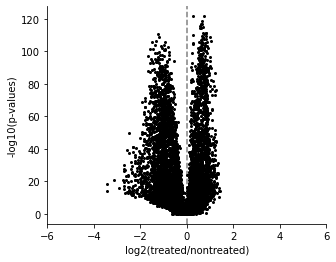

<Figure size 432x288 with 0 Axes>

In [100]:
fig,axes = plt.subplots(1,1,figsize=(5,4))
axes.scatter(show_feat.result['logfoldchanges'],show_feat.result['pvals_adj'],s=4,c='k',edgecolors='k')
axes.axvline(0,linestyle='--',c='k',alpha=0.5)
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
plt.xlabel('log2(treated/nontreated)')
plt.ylabel('-log10(p-values)')
plt.xlim([-6,6])
plt.show()
plt.savefig('figures/volcano_str.pdf')

In [131]:
show_featdist = widgets.interactive(sc_decode.show_featdist, features=show_feat.result['feature names'].astype(str),
                                 embed_method=sc_decode.adata.obsm.keys(),size=(0.05,1,0.1));

In [132]:
show_featdist

interactive(children=(Dropdown(description='features', options=('440.3405', '499.0209', '522.0116', '546.0058'…

In [30]:
# sc_decode.adata.layers['scaled'] = sc.pp.scale(sc_decode.adata, copy=True).X
# sc.pl.rank_genes_groups_matrixplot(sc_decode.adata, n_genes=5,swap_axes=True,groupby='leiden',
#                                 layer='scaled',cmap='coolwarm',figsize=(4,6))

In [ ]:
# with open('../singlecell_peak_data_decode_use.pkl', 'rb') as handle:
#     peak_data_decode = pickle.load(handle)
# cell_names = list(peak_data_decode.keys())
# cell_info = pd.DataFrame({'batch':[cell.split('/')[3] for cell in cell_names],
#                           'name':[cell.split('\\')[1] for cell in cell_names]})
# #cell_info.to_pickle('../cell_info.pkl')

In [123]:
show_embed = widgets.interactive(sc_decode.show_cellEmbed, label=sc_decode.adata.obs.columns,
                                 embed_method=sc_decode.adata.obsm.keys(),size=(0.05,1,0.1));

In [129]:
show_embed

interactive(children=(Dropdown(description='label', options=('types', 'batch', 'leiden'), value='types'), Drop…

In [130]:
plt.savefig('figures/sc_deepmsi_regions.pdf')

<Figure size 432x288 with 0 Axes>

In [63]:
show_embed_label = widgets.interactive(sc_decode.show_cellEmbed_label,label=show_embed.kwargs['label'],
                                 classes=sc_decode.label_class[show_embed.kwargs['label']],embed_method=sc_decode.adata.obsm.keys(),size=(0.05,1,0.1));


In [64]:
show_embed_label

interactive(children=(Text(value='types', description='label'), Dropdown(description='classes', options=('Corp…

In [176]:
sc_decode.adata.layers['scaled'] = sc.pp.scale(sc_decode.adata, copy=True, zero_center=True).X
sc.pl.heatmap(sc_decode.adata, feat_dict,groupby='leiden', use_raw=False,vmax=2,dendrogram=True,
                                   cmap='RdBu_r', layer='scaled')

NameError: name 'feat_dict' is not defined

In [ ]:
np.array(sum([val for val in feat_dict.values()],[])).astype(float)

array([796.6226, 694.5831, 495.8252, 573.5085, 567.4671, 827.7746,
       508.1432, 511.1501, 605.4745, 468.1804, 663.0444, 491.3288,
       488.3164, 534.0306, 554.265 ])

In [985]:
adducts = ['M+H','M+Na','M+K']
site_url = 'https://www.lipidmaps.org/rest/moverz/LIPIDS'

annot_df, matched, unmatched = LipidMaps_annotate(np.array(sum([val for val in feat_dict.values()],[])).astype(float),
                                                  adducts, 10, site_url)

  0%|                                                                                                  | 0/15 [00:00<?, ?it/s]/var/folders/gw/5vpnntfj7dg102qjxmy0d4yh0000gn/T/ipykernel_19823/67124110.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  annot_df, matched, unmatched = LipidMaps_annotate(np.array(sum([val for val in feat_dict.values()],[])).astype(float),
100%|█████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:33<00:00,  2.21s/it]


In [84]:
type_count = []
for i in sc_decode.metadata['leiden'].unique():
    cells = sc_decode.metadata[sc_decode.metadata['leiden']==i]['types']
    type_count.append(cells.value_counts()/cells.shape[0])

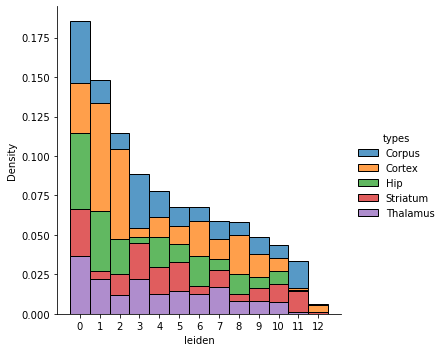

In [85]:
sns.displot(x='leiden',hue='types',data=sc_decode.metadata,stat='density',multiple='stack')

In [12]:
tiss_mz_use = np.load('../mz_use_imzml.npy')

In [32]:
scms_tiss.getIntensMtxData(ppm=5, feature_n=0.05, mz_range=(300,1600),mz_features=tiss_mz_use)
#annot_df_tiss[annot_df_tiss['Input m/z'].isin(scms_tiss.intens_mtx.columns.unique())].to_pickle('Coronal3D_annotation_decoded_shared.pkl')
norm_factor = sc_decode_data.sum(1).values.reshape(-1,1)
# regional_fc.sort_values(by='cortex',ascending=False)

# matched_mz = annot_df_tiss[annot_df_tiss['Input m/z']==regional_fc.sort_values(by='striatum'
#                                                                                ,ascending=False).index[2]]['Input m/z']
# df = pd.DataFrame(scms_tiss.intens_mtx[matched_mz.unique()[0]].values,
#                   columns=[matched_mz.unique()[0]])
# df['types'] = metadata['types'].values

# plt.figure()
# sns.barplot(y=matched_mz.unique()[0],x='types',data=df)
# plt.show()

number of mass bins 1156


100%|█████████████████████████████████████| 1156/1156 [00:00<00:00, 6977.23it/s]


In [33]:
sc_decode_tiss = scMSAnalysis(metadata)
sc_decode_tiss.preprocessing(scms_tiss.intens_mtx,
                            norm_method='rms',feat_drop_rate=0,cell_drop_rate=0)

filtered intensity matrix with shape (13566, 211)


(array([ 5.,  5.,  0.,  0.,  3.,  2.,  4.,  3.,  3., 11., 10., 16., 11.,
        10., 11., 10.,  6., 13., 20., 18., 22., 33., 17., 27., 16., 26.,
        14.,  8.,  9.,  7., 11.,  3., 12.,  3.,  6.,  2.,  3.,  3.,  1.,
         2.]),
 array([ 400.3409  ,  416.309085,  432.27727 ,  448.245455,  464.21364 ,
         480.181825,  496.15001 ,  512.118195,  528.08638 ,  544.054565,
         560.02275 ,  575.990935,  591.95912 ,  607.927305,  623.89549 ,
         639.863675,  655.83186 ,  671.800045,  687.76823 ,  703.736415,
         719.7046  ,  735.672785,  751.64097 ,  767.609155,  783.57734 ,
         799.545525,  815.51371 ,  831.481895,  847.45008 ,  863.418265,
         879.38645 ,  895.354635,  911.32282 ,  927.291005,  943.25919 ,
         959.227375,  975.19556 ,  991.163745, 1007.13193 , 1023.100115,
        1039.0683  ]),
 <BarContainer object of 40 artists>)

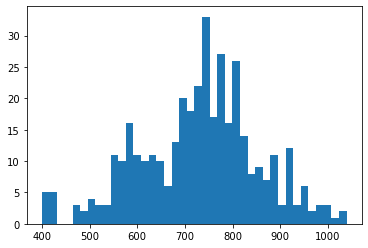

In [24]:
plt.hist(sc_decode_tiss.intens_mtx.columns.astype(float),bins=40)

In [18]:
regional_avg.loc[sc_decode_tiss.intens_mtx.columns]

NameError: name 'regional_avg' is not defined

SpearmanrResult(correlation=0.018470383695109564, pvalue=0.7175467650454372)

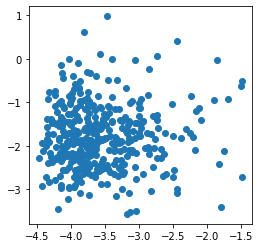

In [248]:
plt.figure(figsize=(4,4))
x = np.log10(regional_avg.loc[sc_decode_tiss.intens_mtx.columns]['hippocampal region'])
y = np.log10(sc_decode_tiss.intens_mtx[sc_decode_tiss.metadata['types']=='Hip'].mean())
plt.scatter(x,y)
spearmanr(x,y)

In [25]:
sc_decode_tiss.get_labels(['types','batch'])
sc_decode_tiss.analyze(n_neighbors=50, n_pcs=30, min_dist=1,
                  resolution = 0.25,categories=['types','leiden'])

computing neighbors..
performing umap...
performing clustering...


/Users/richard/anaconda/envs/scms/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'types' as categorical
/Users/richard/anaconda/envs/scms/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'batch' as categorical
/Users/richard/anaconda/envs/scms/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


In [26]:
show_embed = widgets.interactive(sc_decode_tiss.show_cellEmbed, label=sc_decode_tiss.adata.obs.columns,
                                 embed_method=sc_decode_tiss.adata.obsm.keys(),size=(0.05,1,0.1));
show_embed

interactive(children=(Dropdown(description='label', options=('types', 'batch', 'leiden'), value='types'), Drop…

In [27]:
sc_decode_hip = scMSAnalysis(metadata=metadata[metadata['types']=='Hip'])
sc_decode_hip.preprocessing((scms_tiss.intens_mtx)[metadata['types']=='Hip'],
                            norm_method='rms',feat_drop_rate=0,cell_drop_rate=0)

filtered intensity matrix with shape (2692, 386)


In [28]:
sc_decode_hip.analyze(n_neighbors=30, n_pcs=10, min_dist=0.9, resolution = 0.2, categories=['leiden'])

computing neighbors..
performing umap...
performing clustering...


In [29]:
sc_decode_hip.get_labels(['batch','leiden'])

In [30]:
show_embed = widgets.interactive(sc_decode_hip.show_cellEmbed, label=sc_decode_hip.adata.obs.columns,
                                 embed_method=sc_decode_hip.adata.obsm.keys(),size=(1,3,0.1));
show_embed

interactive(children=(Dropdown(description='label', options=('leiden', 'batch'), value='leiden'), Dropdown(des…

In [1360]:
plt.savefig('figures/tiss_sc_hip_cluster.pdf')

In [31]:
label = 'leiden'
show_feat = widgets.interactive(sc_decode_hip.show_featrank, label = label, region = sc_decode_hip.label_class[label], 
                                rank_by=sc_decode_hip.feat_rank[label].keys(), num_select=8000,
                                num_show=IntSlider(min=0, max=8000, step=20, value=0));
show_feat

interactive(children=(Text(value='leiden', description='label'), Dropdown(description='region', options=('0', …

In [251]:
regional_fc = pd.read_pickle('../coronal3d_regional_fc_shared.pkl')
regional_avg = pd.read_pickle('../coronal3d_regional_avg_shared.pkl')
regional_avg.index = np.round(regional_avg.index,4).astype(str)
regional_fc.index = np.round(regional_fc.index,4).astype(str)

regional_fc = regional_fc.loc[sc_decode_tiss.intens_mtx.columns]

regional_fc.sort_values(by='cortex',ascending=False).head(10)

,basal forebrain,corpus collusum,cortex,corticofugal pathway,hippocampal region,hypothalamus,striatum,thalamus,brainstem,superior colliculus,septal region
602.0059,0.026769,-0.023948,0.858417,-0.535360,0.834165,-0.020909,0.260723,-0.099996,-0.669600,-1.022569,-0.633549
523.0148,1.060521,-1.594650,0.679737,-0.363842,-0.982044,2.122796,0.710019,-1.852360,-2.796054,-2.107784,-1.732312
544.9977,1.103491,-1.619284,0.674384,-0.287905,-1.291319,2.123530,0.765533,-1.947544,-2.898821,-2.227145,-1.653773
551.0148,1.059349,-1.536446,0.657855,-0.267806,-0.940643,2.048966,0.721935,-1.798569,-2.679503,-2.099745,-1.627644
501.034,1.041849,-1.558050,0.654216,-0.334733,-0.904609,2.143395,0.662354,-1.892797,-2.929104,-2.154605,-1.594358
721.0084,1.064962,-1.550479,0.648208,-0.276272,-1.219532,2.122037,0.727407,-1.894514,-2.754577,-2.072333,-1.611712
914.4548,0.216015,-0.250472,0.601621,-0.575636,0.374026,0.025898,0.057406,0.157524,-0.146771,-0.258474,-0.596285
722.4287,0.372984,-0.592042,0.593966,-0.596827,0.596664,0.481895,0.085943,-0.132545,-0.402932,-0.708250,-0.442841
832.5159,0.008614,-0.581782,0.588720,-0.576233,-0.181058,0.002548,-0.089537,0.518084,0.159017,0.474031,-1.029575
815.5187,0.053573,-0.214884,0.572546,-0.691277,0.387572,0.411282,-0.200135,0.478052,-0.056608,-0.200827,-1.433033


In [252]:
regional_change_sc = {}

for types in sc_decode_tiss.metadata['types'].unique():
    _ = sc_decode_tiss.intens_mtx.loc[sc_decode_tiss.metadata['types']==types]
    __ = sc_decode_tiss.intens_mtx.loc[sc_decode_tiss.metadata['types']!=types]
    regional_change_sc[types] = np.log2(_.mean(0)/__.mean(0))
regional_change_sc = pd.DataFrame(regional_change_sc)

/Users/richard/anaconda/envs/scms/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [262]:
regional_change_sc.sort_values(by='Corpus',ascending=False).head(10)

,Corpus,Cortex,Hip,Striatum,Thalamus
783.5685,2.789070,-2.406851,-2.309063,0.220176,-1.238578
851.6744,1.772210,-2.067511,-2.795179,0.344156,0.568256
731.6065,1.576526,-1.728131,-1.660289,0.904165,-0.294405
689.4188,1.526162,-2.738953,-2.008581,0.974516,0.323273
590.1221,1.135288,-1.578630,-1.896949,0.820616,0.497767
665.4563,1.042346,-2.724054,-1.458663,0.757784,0.950452
400.3409,0.899941,-1.062304,-0.904512,0.554617,0.271688
595.3785,0.784765,0.149404,-2.730832,0.046582,0.351595
523.0148,0.767462,-1.320602,-1.231346,0.883020,0.455124
932.5623,0.738526,-0.579032,-1.106368,0.451764,0.273319


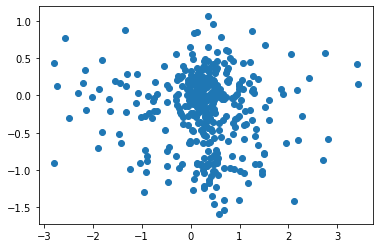

In [265]:
plt.scatter(regional_change_sc['Hip'],regional_fc['hippocampal region'])

<AxesSubplot:ylabel='851.6744'>

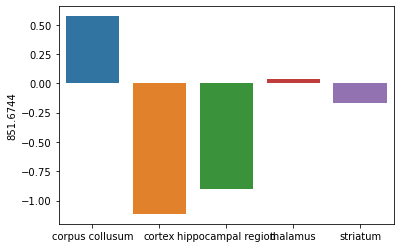

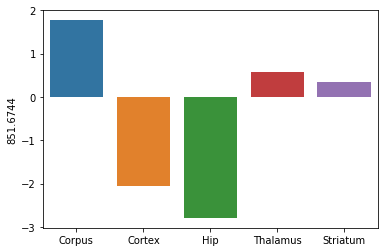

In [263]:
plt.figure()
sns.barplot(x=['corpus collusum','cortex','hippocampal region','thalamus','striatum'],
            y=regional_fc.loc['851.6744'][['corpus collusum','cortex','hippocampal region','thalamus','striatum']])
plt.figure()
sns.barplot(x=['Corpus','Cortex','Hip','Thalamus','Striatum'],
            y=regional_change_sc.loc['851.6744'][['Corpus','Cortex','Hip','Thalamus','Striatum']])
#plt.savefig('figures/710mz_tiss_fc.pdf')

In [23]:
pixel_data = pd.read_pickle('../coronal3D_regional_pixel.pkl')

In [27]:
pixel_data_metadata = pd.read_pickle('../coronal3D_regional_pixel_metadata.pkl')

In [216]:
# import random
# random.seed(19)
# sc_region_list = ['cortex','hippocampal region','striatum','thalamus','corpus collusum']
# rows_id = random.sample(range(0, pixel_data_metadata['regions'].isin(sc_region_list).sum()), 50000)
# sc_region_list = ['cortex','hippocampal region','striatum','thalamus','corpus collusum']
# pixel_data_sampled = pixel_data.iloc[rows_id]
# pixel_data_metadata_sampled = pixel_data_metadata.iloc[rows_id]
# pixel_data_sampled = pixel_data_sampled[scms_tiss.intens_mtx.columns]
# del pixel_data

# from sklearn.metrics.pairwise import cosine_similarity
# tiss_sc_cossim = cosine_similarity(sc_decode_tiss.intens_mtx,pixel_data_sampled)

# tiss_sc_cossim_data = pd.DataFrame({'corr':tiss_sc_cossim[:,pixel_data_metadata_sampled['regions']=='hippocampal region'].mean(1),
#               'type':sc_decode_tiss.metadata['types']})

# sns.boxplot(x='type',y='corr',data=tiss_sc_cossim_data)


In [1499]:
# plt.figure()
# plt.scatter(np.log10(regional_avg.loc[sc_decode_hip.intens_mtx.columns]['hippocampal region']),
#             np.log10(sc_decode_hip.intens_mtx.mean(0)))

In [1530]:
annot_df_tiss.set_index('Input m/z').loc[regional_fc.sort_values(by='hippocampal region',ascending=False).head(15).index]['index'].unique()

[749,   62,  702,  280, 1003,  525,  660,  685, 922,  427,  418]


[749, 62, 702, 280, 1003, 525, 660, 685, 922, 427, 418]

In [186]:
regional_fc.sort_values(by='striatum',ascending=False).head(15).index

Index(['795.5777', '544.9977', '721.0084', '807.6352', '501.034', '409.0554',
       '560.9689', '736.977', '823.6077', '826.6277', '590.1221', '757.6236',
       '742.9975', '494.36', '682.4593'],
      dtype='object')

In [171]:
regional_fc = regional_fc.loc[sc_decode_tiss.intens_mtx.columns]

In [34]:
sc_decode_tiss.adata.layers['scaled'] = sc.pp.scale(sc_decode_tiss.adata, copy=True, zero_center=True).X
sc.pl.matrixplot(sc_decode_tiss.adata,['795.5777', '410.272', '745.4758', '830.5701', '602.0059', '721.9564',
       '807.6352', '831.5724', '682.4593', '722.4287', '741.5278', '553.9517',
       '807.514', '759.4349', '745.9322','636.461', '815.5187', '871.4672', '870.4586', '835.6036', '829.5591', '828.5493',
       '863.6177', '740.5008', '624.5037', '580.3605', '738.5174', '803.5605',
       '825.4629', '802.5631', '880.6605','795.5777', '544.9977', '721.0084', '807.6352', '501.034', '409.0554',
       '560.9689', '736.977', '823.6077', '826.6277', '590.1221', '757.6236',
       '742.9975', '494.36', '682.4593'],
              groupby='leiden',swap_axes=True,dendrogram=True,layer='scaled',cmap='RdBu_r',vmax=1.2,figsize=(4,8),save='hip_sc_top.pdf')


ValueError: groupby has to be a valid observation. Given leiden, is not in observations: []

In [1540]:
annot_df_tiss[annot_df_tiss['index'].isin([418])]

,Input m/z,Matched m/z,Delta,Name,Formula,Ion,ppm,index
2583,800.407895,800.4109,0.0030,PS 35:8;O,C41H64NO11PNa,[M+Na]+,3.748089,418
2584,800.407895,800.4111,0.0032,IPC 32:4;O3,C38H68NO12PK,[M+K]+,3.997962,418


In [1522]:
show_featdist = widgets.interactive(sc_decode_hip.show_featdist, features=['660.3661', '997.5441', '689.3629', '859.6074',
       '423.2731', '768.4213', '713.4042', '698.3802', '772.4949', 
       '796.5884', '800.4079'],
                                 embed_method=sc_decode_hip.adata.obsm.keys(),size=(0.5,2,0.1));

In [1523]:
show_featdist

interactive(children=(Dropdown(description='features', options=('660.3661', '997.5441', '689.3629', '859.6074'…

In [1524]:
plt.savefig('figures/423mz_sc_dist.pdf')

In [1371]:
sc_decode_str = scMSAnalysis(metadata=metadata[metadata['types']=='Striatum'])
sc_decode_str.preprocessing(scms_tiss.intens_mtx[metadata['types']=='Striatum'],
                            norm_method='rms',feat_drop_rate=0,cell_drop_rate=0)

filtered intensity matrix with shape (2143, 176)


In [1372]:
sc_decode_str.analyze(n_neighbors=30, n_pcs=15, min_dist=0.8, resolution = 0.15, categories=['leiden'])

computing neighbors..
performing umap...
performing clustering...


In [1373]:
sc_decode_str.get_labels(['batch','leiden'])

In [1374]:
show_embed = widgets.interactive(sc_decode_str.show_cellEmbed, label=sc_decode_str.adata.obs.columns,
                                 embed_method=sc_decode_str.adata.obsm.keys(),size=(1,3,0.1));
show_embed

interactive(children=(Dropdown(description='label', options=('leiden', 'batch'), value='leiden'), Dropdown(des…

In [1375]:
annot_df_tiss.set_index('Input m/z').loc[regional_fc.sort_values(by='cortex',ascending=False).head(15).index]['index'].unique()


array([ 56, 819, 280, 745, 256, 727, 648, 927, 728, 381, 342, 681, 599,
       989, 619])

In [1376]:
regional_fc.sort_values(by='cortex',ascending=False).head(10)

,basal forebrain,corpus collusum,cortex,corticofugal pathway,hippocampal region,hypothalamus,striatum,thalamus,brainstem,superior colliculus,septal region
1003.592027,0.099869,-0.602469,0.669422,-1.019781,0.197138,0.099144,-0.132004,0.462063,0.094794,0.313477,-1.056594
615.476554,0.276983,-0.359124,0.499216,-0.551843,0.298473,0.111655,0.097762,-0.032313,-0.245668,-0.286634,-0.095498
859.607445,0.233012,-0.349909,0.465496,-0.516603,0.297664,0.216893,0.120593,-0.060139,-0.273433,-0.299006,-0.112448
662.345086,0.175785,-0.240659,0.451179,-0.369643,0.321004,0.079465,0.105128,-0.033585,-0.251683,-0.284232,-0.157793
871.547146,0.021068,-0.593228,0.444868,-0.702675,-0.154394,0.142428,-0.064632,0.289741,0.045161,0.553092,-0.443736
674.380580,-0.084290,-0.071070,0.439564,-0.303789,0.320730,-0.184081,-0.008945,0.295116,-0.096504,-0.019203,-0.511262
718.502526,-0.024973,0.170650,0.377041,-0.140213,0.692723,-0.101804,0.285437,-0.070770,-0.495225,-0.848880,-0.357382
550.331588,0.018219,-0.632589,0.375435,-0.894041,-0.156074,0.195826,-0.201508,0.455037,0.249861,0.591571,-0.682706
674.346095,0.192259,-0.291743,0.350204,-0.427291,0.248580,0.256389,0.080505,-0.091534,-0.219516,-0.270321,-0.021542
811.606360,0.361822,-0.376395,0.337873,-0.335254,0.196573,0.495720,0.078455,-0.161749,-0.291244,-0.542633,-0.102440


In [1377]:
np.round(regional_fc.sort_values(by='thalamus',ascending=False).head(10).index,4).astype(str)

Index(['1003.592', '550.3316', '567.3265', '645.3183', '713.4042', '1039.6712',
       '536.2954', '699.4853', '674.3806', '871.5471'],
      dtype='object')

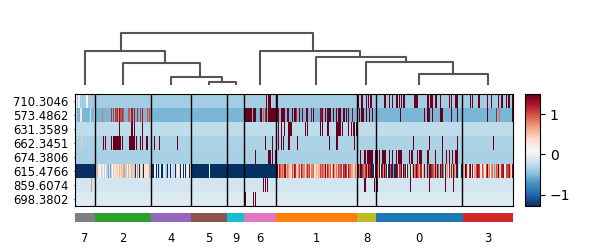

In [1379]:
sc_decode_str.adata.layers['scaled'] = sc.pp.scale(sc_decode_str.adata, copy=True, zero_center=True).X
sc.pl.heatmap(sc_decode_str.adata,[''],
              groupby='leiden',swap_axes=True,dendrogram=True,layer='scaled',cmap='RdBu_r',vmax=1.5,figsize=(6,2.5))

In [1380]:
show_featdist = widgets.interactive(sc_decode_str.show_featdist, features=['710.3046', '573.4862', '631.3589', '662.3451', '674.3806', '615.4766', '859.6074', '698.3802'],
                                 embed_method=sc_decode_str.adata.obsm.keys(),size=(0.5,2,0.1));

In [1381]:
show_featdist

interactive(children=(Dropdown(description='features', options=('710.3046', '573.4862', '631.3589', '662.3451'…